# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

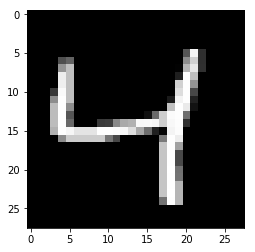

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [18]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    n_batch = 0
    for ii in range(mnist.train.num_examples//batch_size):
        n_batch += batch_size
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Batch: {}...".format(n_batch),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Batch: 200... Training loss: 0.6936
Epoch: 1/20... Batch: 400... Training loss: 0.6906
Epoch: 1/20... Batch: 600... Training loss: 0.6872
Epoch: 1/20... Batch: 800... Training loss: 0.6836
Epoch: 1/20... Batch: 1000... Training loss: 0.6795
Epoch: 1/20... Batch: 1200... Training loss: 0.6737
Epoch: 1/20... Batch: 1400... Training loss: 0.6679
Epoch: 1/20... Batch: 1600... Training loss: 0.6603
Epoch: 1/20... Batch: 1800... Training loss: 0.6519
Epoch: 1/20... Batch: 2000... Training loss: 0.6418
Epoch: 1/20... Batch: 2200... Training loss: 0.6312
Epoch: 1/20... Batch: 2400... Training loss: 0.6210
Epoch: 1/20... Batch: 2600... Training loss: 0.6047
Epoch: 1/20... Batch: 2800... Training loss: 0.5930
Epoch: 1/20... Batch: 3000... Training loss: 0.5769
Epoch: 1/20... Batch: 3200... Training loss: 0.5600
Epoch: 1/20... Batch: 3400... Training loss: 0.5425
Epoch: 1/20... Batch: 3600... Training loss: 0.5284
Epoch: 1/20... Batch: 3800... Training loss: 0.5077
Epoch: 1/20... B

Epoch: 1/20... Batch: 32200... Training loss: 0.2105
Epoch: 1/20... Batch: 32400... Training loss: 0.2165
Epoch: 1/20... Batch: 32600... Training loss: 0.2139
Epoch: 1/20... Batch: 32800... Training loss: 0.2138
Epoch: 1/20... Batch: 33000... Training loss: 0.2116
Epoch: 1/20... Batch: 33200... Training loss: 0.2137
Epoch: 1/20... Batch: 33400... Training loss: 0.2155
Epoch: 1/20... Batch: 33600... Training loss: 0.2077
Epoch: 1/20... Batch: 33800... Training loss: 0.2186
Epoch: 1/20... Batch: 34000... Training loss: 0.2164
Epoch: 1/20... Batch: 34200... Training loss: 0.2080
Epoch: 1/20... Batch: 34400... Training loss: 0.2145
Epoch: 1/20... Batch: 34600... Training loss: 0.2129
Epoch: 1/20... Batch: 34800... Training loss: 0.2099
Epoch: 1/20... Batch: 35000... Training loss: 0.2079
Epoch: 1/20... Batch: 35200... Training loss: 0.2062
Epoch: 1/20... Batch: 35400... Training loss: 0.2085
Epoch: 1/20... Batch: 35600... Training loss: 0.2094
Epoch: 1/20... Batch: 35800... Training loss: 

Epoch: 2/20... Batch: 10400... Training loss: 0.1658
Epoch: 2/20... Batch: 10600... Training loss: 0.1721
Epoch: 2/20... Batch: 10800... Training loss: 0.1695
Epoch: 2/20... Batch: 11000... Training loss: 0.1649
Epoch: 2/20... Batch: 11200... Training loss: 0.1681
Epoch: 2/20... Batch: 11400... Training loss: 0.1735
Epoch: 2/20... Batch: 11600... Training loss: 0.1730
Epoch: 2/20... Batch: 11800... Training loss: 0.1662
Epoch: 2/20... Batch: 12000... Training loss: 0.1736
Epoch: 2/20... Batch: 12200... Training loss: 0.1681
Epoch: 2/20... Batch: 12400... Training loss: 0.1693
Epoch: 2/20... Batch: 12600... Training loss: 0.1605
Epoch: 2/20... Batch: 12800... Training loss: 0.1710
Epoch: 2/20... Batch: 13000... Training loss: 0.1659
Epoch: 2/20... Batch: 13200... Training loss: 0.1755
Epoch: 2/20... Batch: 13400... Training loss: 0.1662
Epoch: 2/20... Batch: 13600... Training loss: 0.1693
Epoch: 2/20... Batch: 13800... Training loss: 0.1629
Epoch: 2/20... Batch: 14000... Training loss: 

Epoch: 2/20... Batch: 49800... Training loss: 0.1525
Epoch: 2/20... Batch: 50000... Training loss: 0.1516
Epoch: 2/20... Batch: 50200... Training loss: 0.1498
Epoch: 2/20... Batch: 50400... Training loss: 0.1427
Epoch: 2/20... Batch: 50600... Training loss: 0.1483
Epoch: 2/20... Batch: 50800... Training loss: 0.1452
Epoch: 2/20... Batch: 51000... Training loss: 0.1456
Epoch: 2/20... Batch: 51200... Training loss: 0.1457
Epoch: 2/20... Batch: 51400... Training loss: 0.1477
Epoch: 2/20... Batch: 51600... Training loss: 0.1510
Epoch: 2/20... Batch: 51800... Training loss: 0.1485
Epoch: 2/20... Batch: 52000... Training loss: 0.1399
Epoch: 2/20... Batch: 52200... Training loss: 0.1470
Epoch: 2/20... Batch: 52400... Training loss: 0.1511
Epoch: 2/20... Batch: 52600... Training loss: 0.1435
Epoch: 2/20... Batch: 52800... Training loss: 0.1436
Epoch: 2/20... Batch: 53000... Training loss: 0.1486
Epoch: 2/20... Batch: 53200... Training loss: 0.1491
Epoch: 2/20... Batch: 53400... Training loss: 

Epoch: 3/20... Batch: 25200... Training loss: 0.1315
Epoch: 3/20... Batch: 25400... Training loss: 0.1330
Epoch: 3/20... Batch: 25600... Training loss: 0.1333
Epoch: 3/20... Batch: 25800... Training loss: 0.1322
Epoch: 3/20... Batch: 26000... Training loss: 0.1393
Epoch: 3/20... Batch: 26200... Training loss: 0.1311
Epoch: 3/20... Batch: 26400... Training loss: 0.1342
Epoch: 3/20... Batch: 26600... Training loss: 0.1352
Epoch: 3/20... Batch: 26800... Training loss: 0.1371
Epoch: 3/20... Batch: 27000... Training loss: 0.1382
Epoch: 3/20... Batch: 27200... Training loss: 0.1347
Epoch: 3/20... Batch: 27400... Training loss: 0.1276
Epoch: 3/20... Batch: 27600... Training loss: 0.1337
Epoch: 3/20... Batch: 27800... Training loss: 0.1405
Epoch: 3/20... Batch: 28000... Training loss: 0.1322
Epoch: 3/20... Batch: 28200... Training loss: 0.1345
Epoch: 3/20... Batch: 28400... Training loss: 0.1347
Epoch: 3/20... Batch: 28600... Training loss: 0.1336
Epoch: 3/20... Batch: 28800... Training loss: 

Epoch: 3/20... Batch: 60000... Training loss: 0.1226
Epoch: 4/20... Batch: 200... Training loss: 0.1269
Epoch: 4/20... Batch: 400... Training loss: 0.1291
Epoch: 4/20... Batch: 600... Training loss: 0.1319
Epoch: 4/20... Batch: 800... Training loss: 0.1299
Epoch: 4/20... Batch: 1000... Training loss: 0.1273
Epoch: 4/20... Batch: 1200... Training loss: 0.1254
Epoch: 4/20... Batch: 1400... Training loss: 0.1283
Epoch: 4/20... Batch: 1600... Training loss: 0.1271
Epoch: 4/20... Batch: 1800... Training loss: 0.1233
Epoch: 4/20... Batch: 2000... Training loss: 0.1292
Epoch: 4/20... Batch: 2200... Training loss: 0.1284
Epoch: 4/20... Batch: 2400... Training loss: 0.1263
Epoch: 4/20... Batch: 2600... Training loss: 0.1247
Epoch: 4/20... Batch: 2800... Training loss: 0.1261
Epoch: 4/20... Batch: 3000... Training loss: 0.1218
Epoch: 4/20... Batch: 3200... Training loss: 0.1273
Epoch: 4/20... Batch: 3400... Training loss: 0.1231
Epoch: 4/20... Batch: 3600... Training loss: 0.1303
Epoch: 4/20... 

Epoch: 4/20... Batch: 41200... Training loss: 0.1215
Epoch: 4/20... Batch: 41400... Training loss: 0.1188
Epoch: 4/20... Batch: 41600... Training loss: 0.1170
Epoch: 4/20... Batch: 41800... Training loss: 0.1139
Epoch: 4/20... Batch: 42000... Training loss: 0.1200
Epoch: 4/20... Batch: 42200... Training loss: 0.1210
Epoch: 4/20... Batch: 42400... Training loss: 0.1241
Epoch: 4/20... Batch: 42600... Training loss: 0.1178
Epoch: 4/20... Batch: 42800... Training loss: 0.1156
Epoch: 4/20... Batch: 43000... Training loss: 0.1217
Epoch: 4/20... Batch: 43200... Training loss: 0.1153
Epoch: 4/20... Batch: 43400... Training loss: 0.1181
Epoch: 4/20... Batch: 43600... Training loss: 0.1147
Epoch: 4/20... Batch: 43800... Training loss: 0.1194
Epoch: 4/20... Batch: 44000... Training loss: 0.1191
Epoch: 4/20... Batch: 44200... Training loss: 0.1220
Epoch: 4/20... Batch: 44400... Training loss: 0.1180
Epoch: 4/20... Batch: 44600... Training loss: 0.1158
Epoch: 4/20... Batch: 44800... Training loss: 

Epoch: 5/20... Batch: 20600... Training loss: 0.1072
Epoch: 5/20... Batch: 20800... Training loss: 0.1099
Epoch: 5/20... Batch: 21000... Training loss: 0.1110
Epoch: 5/20... Batch: 21200... Training loss: 0.1103
Epoch: 5/20... Batch: 21400... Training loss: 0.1116
Epoch: 5/20... Batch: 21600... Training loss: 0.1095
Epoch: 5/20... Batch: 21800... Training loss: 0.1110
Epoch: 5/20... Batch: 22000... Training loss: 0.1175
Epoch: 5/20... Batch: 22200... Training loss: 0.1107
Epoch: 5/20... Batch: 22400... Training loss: 0.1138
Epoch: 5/20... Batch: 22600... Training loss: 0.1116
Epoch: 5/20... Batch: 22800... Training loss: 0.1157
Epoch: 5/20... Batch: 23000... Training loss: 0.1148
Epoch: 5/20... Batch: 23200... Training loss: 0.1119
Epoch: 5/20... Batch: 23400... Training loss: 0.1145
Epoch: 5/20... Batch: 23600... Training loss: 0.1126
Epoch: 5/20... Batch: 23800... Training loss: 0.1131
Epoch: 5/20... Batch: 24000... Training loss: 0.1114
Epoch: 5/20... Batch: 24200... Training loss: 

Epoch: 5/20... Batch: 52800... Training loss: 0.1104
Epoch: 5/20... Batch: 53000... Training loss: 0.1111
Epoch: 5/20... Batch: 53200... Training loss: 0.1103
Epoch: 5/20... Batch: 53400... Training loss: 0.1120
Epoch: 5/20... Batch: 53600... Training loss: 0.1143
Epoch: 5/20... Batch: 53800... Training loss: 0.1113
Epoch: 5/20... Batch: 54000... Training loss: 0.1100
Epoch: 5/20... Batch: 54200... Training loss: 0.1079
Epoch: 5/20... Batch: 54400... Training loss: 0.1114
Epoch: 5/20... Batch: 54600... Training loss: 0.1113
Epoch: 5/20... Batch: 54800... Training loss: 0.1070
Epoch: 5/20... Batch: 55000... Training loss: 0.1089
Epoch: 5/20... Batch: 55200... Training loss: 0.1130
Epoch: 5/20... Batch: 55400... Training loss: 0.1064
Epoch: 5/20... Batch: 55600... Training loss: 0.1074
Epoch: 5/20... Batch: 55800... Training loss: 0.1082
Epoch: 5/20... Batch: 56000... Training loss: 0.1106
Epoch: 5/20... Batch: 56200... Training loss: 0.1065
Epoch: 5/20... Batch: 56400... Training loss: 

Epoch: 6/20... Batch: 32800... Training loss: 0.1051
Epoch: 6/20... Batch: 33000... Training loss: 0.1009
Epoch: 6/20... Batch: 33200... Training loss: 0.1059
Epoch: 6/20... Batch: 33400... Training loss: 0.1040
Epoch: 6/20... Batch: 33600... Training loss: 0.1003
Epoch: 6/20... Batch: 33800... Training loss: 0.1067
Epoch: 6/20... Batch: 34000... Training loss: 0.1071
Epoch: 6/20... Batch: 34200... Training loss: 0.1072
Epoch: 6/20... Batch: 34400... Training loss: 0.1042
Epoch: 6/20... Batch: 34600... Training loss: 0.1050
Epoch: 6/20... Batch: 34800... Training loss: 0.1051
Epoch: 6/20... Batch: 35000... Training loss: 0.1062
Epoch: 6/20... Batch: 35200... Training loss: 0.1055
Epoch: 6/20... Batch: 35400... Training loss: 0.1045
Epoch: 6/20... Batch: 35600... Training loss: 0.1080
Epoch: 6/20... Batch: 35800... Training loss: 0.1045
Epoch: 6/20... Batch: 36000... Training loss: 0.1010
Epoch: 6/20... Batch: 36200... Training loss: 0.1039
Epoch: 6/20... Batch: 36400... Training loss: 

Epoch: 7/20... Batch: 10200... Training loss: 0.1005
Epoch: 7/20... Batch: 10400... Training loss: 0.1047
Epoch: 7/20... Batch: 10600... Training loss: 0.1063
Epoch: 7/20... Batch: 10800... Training loss: 0.1031
Epoch: 7/20... Batch: 11000... Training loss: 0.1006
Epoch: 7/20... Batch: 11200... Training loss: 0.1022
Epoch: 7/20... Batch: 11400... Training loss: 0.0999
Epoch: 7/20... Batch: 11600... Training loss: 0.1032
Epoch: 7/20... Batch: 11800... Training loss: 0.1059
Epoch: 7/20... Batch: 12000... Training loss: 0.1010
Epoch: 7/20... Batch: 12200... Training loss: 0.1046
Epoch: 7/20... Batch: 12400... Training loss: 0.1013
Epoch: 7/20... Batch: 12600... Training loss: 0.1040
Epoch: 7/20... Batch: 12800... Training loss: 0.1041
Epoch: 7/20... Batch: 13000... Training loss: 0.1063
Epoch: 7/20... Batch: 13200... Training loss: 0.1024
Epoch: 7/20... Batch: 13400... Training loss: 0.0989
Epoch: 7/20... Batch: 13600... Training loss: 0.1031
Epoch: 7/20... Batch: 13800... Training loss: 

Epoch: 7/20... Batch: 51400... Training loss: 0.0983
Epoch: 7/20... Batch: 51600... Training loss: 0.1017
Epoch: 7/20... Batch: 51800... Training loss: 0.1015
Epoch: 7/20... Batch: 52000... Training loss: 0.1014
Epoch: 7/20... Batch: 52200... Training loss: 0.1036
Epoch: 7/20... Batch: 52400... Training loss: 0.1003
Epoch: 7/20... Batch: 52600... Training loss: 0.0984
Epoch: 7/20... Batch: 52800... Training loss: 0.1010
Epoch: 7/20... Batch: 53000... Training loss: 0.1002
Epoch: 7/20... Batch: 53200... Training loss: 0.1016
Epoch: 7/20... Batch: 53400... Training loss: 0.1019
Epoch: 7/20... Batch: 53600... Training loss: 0.1002
Epoch: 7/20... Batch: 53800... Training loss: 0.1049
Epoch: 7/20... Batch: 54000... Training loss: 0.0993
Epoch: 7/20... Batch: 54200... Training loss: 0.0998
Epoch: 7/20... Batch: 54400... Training loss: 0.1037
Epoch: 7/20... Batch: 54600... Training loss: 0.1002
Epoch: 7/20... Batch: 54800... Training loss: 0.1013
Epoch: 7/20... Batch: 55000... Training loss: 

Epoch: 8/20... Batch: 32000... Training loss: 0.0981
Epoch: 8/20... Batch: 32200... Training loss: 0.0948
Epoch: 8/20... Batch: 32400... Training loss: 0.0959
Epoch: 8/20... Batch: 32600... Training loss: 0.0993
Epoch: 8/20... Batch: 32800... Training loss: 0.1023
Epoch: 8/20... Batch: 33000... Training loss: 0.0988
Epoch: 8/20... Batch: 33200... Training loss: 0.0980
Epoch: 8/20... Batch: 33400... Training loss: 0.0967
Epoch: 8/20... Batch: 33600... Training loss: 0.0999
Epoch: 8/20... Batch: 33800... Training loss: 0.0980
Epoch: 8/20... Batch: 34000... Training loss: 0.0986
Epoch: 8/20... Batch: 34200... Training loss: 0.0982
Epoch: 8/20... Batch: 34400... Training loss: 0.0993
Epoch: 8/20... Batch: 34600... Training loss: 0.0978
Epoch: 8/20... Batch: 34800... Training loss: 0.0944
Epoch: 8/20... Batch: 35000... Training loss: 0.0991
Epoch: 8/20... Batch: 35200... Training loss: 0.0987
Epoch: 8/20... Batch: 35400... Training loss: 0.0953
Epoch: 8/20... Batch: 35600... Training loss: 

Epoch: 9/20... Batch: 10200... Training loss: 0.0953
Epoch: 9/20... Batch: 10400... Training loss: 0.1002
Epoch: 9/20... Batch: 10600... Training loss: 0.0996
Epoch: 9/20... Batch: 10800... Training loss: 0.0979
Epoch: 9/20... Batch: 11000... Training loss: 0.0959
Epoch: 9/20... Batch: 11200... Training loss: 0.0972
Epoch: 9/20... Batch: 11400... Training loss: 0.0988
Epoch: 9/20... Batch: 11600... Training loss: 0.0968
Epoch: 9/20... Batch: 11800... Training loss: 0.1009
Epoch: 9/20... Batch: 12000... Training loss: 0.0952
Epoch: 9/20... Batch: 12200... Training loss: 0.0950
Epoch: 9/20... Batch: 12400... Training loss: 0.1007
Epoch: 9/20... Batch: 12600... Training loss: 0.0970
Epoch: 9/20... Batch: 12800... Training loss: 0.0948
Epoch: 9/20... Batch: 13000... Training loss: 0.1032
Epoch: 9/20... Batch: 13200... Training loss: 0.0995
Epoch: 9/20... Batch: 13400... Training loss: 0.0981
Epoch: 9/20... Batch: 13600... Training loss: 0.0942
Epoch: 9/20... Batch: 13800... Training loss: 

Epoch: 9/20... Batch: 50600... Training loss: 0.0973
Epoch: 9/20... Batch: 50800... Training loss: 0.0949
Epoch: 9/20... Batch: 51000... Training loss: 0.0940
Epoch: 9/20... Batch: 51200... Training loss: 0.0963
Epoch: 9/20... Batch: 51400... Training loss: 0.0960
Epoch: 9/20... Batch: 51600... Training loss: 0.1005
Epoch: 9/20... Batch: 51800... Training loss: 0.0942
Epoch: 9/20... Batch: 52000... Training loss: 0.0954
Epoch: 9/20... Batch: 52200... Training loss: 0.0984
Epoch: 9/20... Batch: 52400... Training loss: 0.0963
Epoch: 9/20... Batch: 52600... Training loss: 0.1000
Epoch: 9/20... Batch: 52800... Training loss: 0.0976
Epoch: 9/20... Batch: 53000... Training loss: 0.0945
Epoch: 9/20... Batch: 53200... Training loss: 0.0979
Epoch: 9/20... Batch: 53400... Training loss: 0.0985
Epoch: 9/20... Batch: 53600... Training loss: 0.0970
Epoch: 9/20... Batch: 53800... Training loss: 0.0942
Epoch: 9/20... Batch: 54000... Training loss: 0.0977
Epoch: 9/20... Batch: 54200... Training loss: 

Epoch: 10/20... Batch: 31400... Training loss: 0.0955
Epoch: 10/20... Batch: 31600... Training loss: 0.0941
Epoch: 10/20... Batch: 31800... Training loss: 0.0973
Epoch: 10/20... Batch: 32000... Training loss: 0.0961
Epoch: 10/20... Batch: 32200... Training loss: 0.0975
Epoch: 10/20... Batch: 32400... Training loss: 0.0921
Epoch: 10/20... Batch: 32600... Training loss: 0.0961
Epoch: 10/20... Batch: 32800... Training loss: 0.0951
Epoch: 10/20... Batch: 33000... Training loss: 0.0977
Epoch: 10/20... Batch: 33200... Training loss: 0.0950
Epoch: 10/20... Batch: 33400... Training loss: 0.0938
Epoch: 10/20... Batch: 33600... Training loss: 0.0941
Epoch: 10/20... Batch: 33800... Training loss: 0.0955
Epoch: 10/20... Batch: 34000... Training loss: 0.0948
Epoch: 10/20... Batch: 34200... Training loss: 0.0980
Epoch: 10/20... Batch: 34400... Training loss: 0.0972
Epoch: 10/20... Batch: 34600... Training loss: 0.0950
Epoch: 10/20... Batch: 34800... Training loss: 0.0944
Epoch: 10/20... Batch: 35000

Epoch: 11/20... Batch: 10200... Training loss: 0.0972
Epoch: 11/20... Batch: 10400... Training loss: 0.0941
Epoch: 11/20... Batch: 10600... Training loss: 0.0956
Epoch: 11/20... Batch: 10800... Training loss: 0.0965
Epoch: 11/20... Batch: 11000... Training loss: 0.0984
Epoch: 11/20... Batch: 11200... Training loss: 0.0953
Epoch: 11/20... Batch: 11400... Training loss: 0.0950
Epoch: 11/20... Batch: 11600... Training loss: 0.0967
Epoch: 11/20... Batch: 11800... Training loss: 0.0934
Epoch: 11/20... Batch: 12000... Training loss: 0.0940
Epoch: 11/20... Batch: 12200... Training loss: 0.0970
Epoch: 11/20... Batch: 12400... Training loss: 0.0962
Epoch: 11/20... Batch: 12600... Training loss: 0.0950
Epoch: 11/20... Batch: 12800... Training loss: 0.0986
Epoch: 11/20... Batch: 13000... Training loss: 0.0941
Epoch: 11/20... Batch: 13200... Training loss: 0.0960
Epoch: 11/20... Batch: 13400... Training loss: 0.0939
Epoch: 11/20... Batch: 13600... Training loss: 0.0975
Epoch: 11/20... Batch: 13800

Epoch: 11/20... Batch: 41600... Training loss: 0.0973
Epoch: 11/20... Batch: 41800... Training loss: 0.0938
Epoch: 11/20... Batch: 42000... Training loss: 0.0933
Epoch: 11/20... Batch: 42200... Training loss: 0.0957
Epoch: 11/20... Batch: 42400... Training loss: 0.0999
Epoch: 11/20... Batch: 42600... Training loss: 0.0946
Epoch: 11/20... Batch: 42800... Training loss: 0.0918
Epoch: 11/20... Batch: 43000... Training loss: 0.0980
Epoch: 11/20... Batch: 43200... Training loss: 0.0950
Epoch: 11/20... Batch: 43400... Training loss: 0.0986
Epoch: 11/20... Batch: 43600... Training loss: 0.0903
Epoch: 11/20... Batch: 43800... Training loss: 0.0906
Epoch: 11/20... Batch: 44000... Training loss: 0.0964
Epoch: 11/20... Batch: 44200... Training loss: 0.0959
Epoch: 11/20... Batch: 44400... Training loss: 0.0972
Epoch: 11/20... Batch: 44600... Training loss: 0.0938
Epoch: 11/20... Batch: 44800... Training loss: 0.0956
Epoch: 11/20... Batch: 45000... Training loss: 0.0937
Epoch: 11/20... Batch: 45200

Epoch: 12/20... Batch: 21400... Training loss: 0.0960
Epoch: 12/20... Batch: 21600... Training loss: 0.0960
Epoch: 12/20... Batch: 21800... Training loss: 0.0964
Epoch: 12/20... Batch: 22000... Training loss: 0.0951
Epoch: 12/20... Batch: 22200... Training loss: 0.0921
Epoch: 12/20... Batch: 22400... Training loss: 0.0936
Epoch: 12/20... Batch: 22600... Training loss: 0.0936
Epoch: 12/20... Batch: 22800... Training loss: 0.0964
Epoch: 12/20... Batch: 23000... Training loss: 0.0962
Epoch: 12/20... Batch: 23200... Training loss: 0.0954
Epoch: 12/20... Batch: 23400... Training loss: 0.0954
Epoch: 12/20... Batch: 23600... Training loss: 0.0934
Epoch: 12/20... Batch: 23800... Training loss: 0.0970
Epoch: 12/20... Batch: 24000... Training loss: 0.0944
Epoch: 12/20... Batch: 24200... Training loss: 0.0955
Epoch: 12/20... Batch: 24400... Training loss: 0.0929
Epoch: 12/20... Batch: 24600... Training loss: 0.0941
Epoch: 12/20... Batch: 24800... Training loss: 0.0976
Epoch: 12/20... Batch: 25000

Epoch: 12/20... Batch: 53600... Training loss: 0.0947
Epoch: 12/20... Batch: 53800... Training loss: 0.0932
Epoch: 12/20... Batch: 54000... Training loss: 0.0961
Epoch: 12/20... Batch: 54200... Training loss: 0.0935
Epoch: 12/20... Batch: 54400... Training loss: 0.0933
Epoch: 12/20... Batch: 54600... Training loss: 0.0910
Epoch: 12/20... Batch: 54800... Training loss: 0.0983
Epoch: 12/20... Batch: 55000... Training loss: 0.0912
Epoch: 12/20... Batch: 55200... Training loss: 0.0952
Epoch: 12/20... Batch: 55400... Training loss: 0.0945
Epoch: 12/20... Batch: 55600... Training loss: 0.0941
Epoch: 12/20... Batch: 55800... Training loss: 0.0920
Epoch: 12/20... Batch: 56000... Training loss: 0.0940
Epoch: 12/20... Batch: 56200... Training loss: 0.0946
Epoch: 12/20... Batch: 56400... Training loss: 0.0928
Epoch: 12/20... Batch: 56600... Training loss: 0.0931
Epoch: 12/20... Batch: 56800... Training loss: 0.0909
Epoch: 12/20... Batch: 57000... Training loss: 0.0974
Epoch: 12/20... Batch: 57200

Epoch: 13/20... Batch: 28200... Training loss: 0.0953
Epoch: 13/20... Batch: 28400... Training loss: 0.0940
Epoch: 13/20... Batch: 28600... Training loss: 0.0957
Epoch: 13/20... Batch: 28800... Training loss: 0.0946
Epoch: 13/20... Batch: 29000... Training loss: 0.0922
Epoch: 13/20... Batch: 29200... Training loss: 0.0943
Epoch: 13/20... Batch: 29400... Training loss: 0.0945
Epoch: 13/20... Batch: 29600... Training loss: 0.0977
Epoch: 13/20... Batch: 29800... Training loss: 0.0962
Epoch: 13/20... Batch: 30000... Training loss: 0.0976
Epoch: 13/20... Batch: 30200... Training loss: 0.0955
Epoch: 13/20... Batch: 30400... Training loss: 0.0952
Epoch: 13/20... Batch: 30600... Training loss: 0.0933
Epoch: 13/20... Batch: 30800... Training loss: 0.0945
Epoch: 13/20... Batch: 31000... Training loss: 0.0913
Epoch: 13/20... Batch: 31200... Training loss: 0.0958
Epoch: 13/20... Batch: 31400... Training loss: 0.0917
Epoch: 13/20... Batch: 31600... Training loss: 0.0937
Epoch: 13/20... Batch: 31800

Epoch: 13/20... Batch: 60000... Training loss: 0.0914
Epoch: 14/20... Batch: 200... Training loss: 0.0919
Epoch: 14/20... Batch: 400... Training loss: 0.0947
Epoch: 14/20... Batch: 600... Training loss: 0.0950
Epoch: 14/20... Batch: 800... Training loss: 0.0962
Epoch: 14/20... Batch: 1000... Training loss: 0.0915
Epoch: 14/20... Batch: 1200... Training loss: 0.0973
Epoch: 14/20... Batch: 1400... Training loss: 0.0926
Epoch: 14/20... Batch: 1600... Training loss: 0.0947
Epoch: 14/20... Batch: 1800... Training loss: 0.0955
Epoch: 14/20... Batch: 2000... Training loss: 0.0964
Epoch: 14/20... Batch: 2200... Training loss: 0.0936
Epoch: 14/20... Batch: 2400... Training loss: 0.0906
Epoch: 14/20... Batch: 2600... Training loss: 0.0911
Epoch: 14/20... Batch: 2800... Training loss: 0.0966
Epoch: 14/20... Batch: 3000... Training loss: 0.0942
Epoch: 14/20... Batch: 3200... Training loss: 0.0929
Epoch: 14/20... Batch: 3400... Training loss: 0.0912
Epoch: 14/20... Batch: 3600... Training loss: 0.0

Epoch: 14/20... Batch: 32200... Training loss: 0.0966
Epoch: 14/20... Batch: 32400... Training loss: 0.0940
Epoch: 14/20... Batch: 32600... Training loss: 0.0931
Epoch: 14/20... Batch: 32800... Training loss: 0.0956
Epoch: 14/20... Batch: 33000... Training loss: 0.0949
Epoch: 14/20... Batch: 33200... Training loss: 0.0933
Epoch: 14/20... Batch: 33400... Training loss: 0.0943
Epoch: 14/20... Batch: 33600... Training loss: 0.0969
Epoch: 14/20... Batch: 33800... Training loss: 0.0925
Epoch: 14/20... Batch: 34000... Training loss: 0.0935
Epoch: 14/20... Batch: 34200... Training loss: 0.0931
Epoch: 14/20... Batch: 34400... Training loss: 0.0930
Epoch: 14/20... Batch: 34600... Training loss: 0.0949
Epoch: 14/20... Batch: 34800... Training loss: 0.0940
Epoch: 14/20... Batch: 35000... Training loss: 0.0949
Epoch: 14/20... Batch: 35200... Training loss: 0.0934
Epoch: 14/20... Batch: 35400... Training loss: 0.0928
Epoch: 14/20... Batch: 35600... Training loss: 0.0990
Epoch: 14/20... Batch: 35800

Epoch: 15/20... Batch: 10600... Training loss: 0.0927
Epoch: 15/20... Batch: 10800... Training loss: 0.0930
Epoch: 15/20... Batch: 11000... Training loss: 0.0940
Epoch: 15/20... Batch: 11200... Training loss: 0.0953
Epoch: 15/20... Batch: 11400... Training loss: 0.0948
Epoch: 15/20... Batch: 11600... Training loss: 0.0895
Epoch: 15/20... Batch: 11800... Training loss: 0.0962
Epoch: 15/20... Batch: 12000... Training loss: 0.0900
Epoch: 15/20... Batch: 12200... Training loss: 0.0938
Epoch: 15/20... Batch: 12400... Training loss: 0.0945
Epoch: 15/20... Batch: 12600... Training loss: 0.0982
Epoch: 15/20... Batch: 12800... Training loss: 0.0914
Epoch: 15/20... Batch: 13000... Training loss: 0.0945
Epoch: 15/20... Batch: 13200... Training loss: 0.0988
Epoch: 15/20... Batch: 13400... Training loss: 0.0950
Epoch: 15/20... Batch: 13600... Training loss: 0.0985
Epoch: 15/20... Batch: 13800... Training loss: 0.0972
Epoch: 15/20... Batch: 14000... Training loss: 0.0931
Epoch: 15/20... Batch: 14200

Epoch: 15/20... Batch: 42200... Training loss: 0.0936
Epoch: 15/20... Batch: 42400... Training loss: 0.0919
Epoch: 15/20... Batch: 42600... Training loss: 0.0938
Epoch: 15/20... Batch: 42800... Training loss: 0.0921
Epoch: 15/20... Batch: 43000... Training loss: 0.0947
Epoch: 15/20... Batch: 43200... Training loss: 0.0908
Epoch: 15/20... Batch: 43400... Training loss: 0.0922
Epoch: 15/20... Batch: 43600... Training loss: 0.0912
Epoch: 15/20... Batch: 43800... Training loss: 0.0937
Epoch: 15/20... Batch: 44000... Training loss: 0.0968
Epoch: 15/20... Batch: 44200... Training loss: 0.0935
Epoch: 15/20... Batch: 44400... Training loss: 0.0952
Epoch: 15/20... Batch: 44600... Training loss: 0.0927
Epoch: 15/20... Batch: 44800... Training loss: 0.0967
Epoch: 15/20... Batch: 45000... Training loss: 0.0948
Epoch: 15/20... Batch: 45200... Training loss: 0.0937
Epoch: 15/20... Batch: 45400... Training loss: 0.0954
Epoch: 15/20... Batch: 45600... Training loss: 0.0930
Epoch: 15/20... Batch: 45800

Epoch: 16/20... Batch: 19200... Training loss: 0.0929
Epoch: 16/20... Batch: 19400... Training loss: 0.0954
Epoch: 16/20... Batch: 19600... Training loss: 0.0948
Epoch: 16/20... Batch: 19800... Training loss: 0.0935
Epoch: 16/20... Batch: 20000... Training loss: 0.0892
Epoch: 16/20... Batch: 20200... Training loss: 0.0951
Epoch: 16/20... Batch: 20400... Training loss: 0.0869
Epoch: 16/20... Batch: 20600... Training loss: 0.0967
Epoch: 16/20... Batch: 20800... Training loss: 0.0929
Epoch: 16/20... Batch: 21000... Training loss: 0.0947
Epoch: 16/20... Batch: 21200... Training loss: 0.0945
Epoch: 16/20... Batch: 21400... Training loss: 0.0935
Epoch: 16/20... Batch: 21600... Training loss: 0.0889
Epoch: 16/20... Batch: 21800... Training loss: 0.0981
Epoch: 16/20... Batch: 22000... Training loss: 0.0918
Epoch: 16/20... Batch: 22200... Training loss: 0.0947
Epoch: 16/20... Batch: 22400... Training loss: 0.0929
Epoch: 16/20... Batch: 22600... Training loss: 0.0928
Epoch: 16/20... Batch: 22800

Epoch: 16/20... Batch: 56000... Training loss: 0.0934
Epoch: 16/20... Batch: 56200... Training loss: 0.0942
Epoch: 16/20... Batch: 56400... Training loss: 0.0915
Epoch: 16/20... Batch: 56600... Training loss: 0.0947
Epoch: 16/20... Batch: 56800... Training loss: 0.0926
Epoch: 16/20... Batch: 57000... Training loss: 0.0939
Epoch: 16/20... Batch: 57200... Training loss: 0.0939
Epoch: 16/20... Batch: 57400... Training loss: 0.0922
Epoch: 16/20... Batch: 57600... Training loss: 0.0869
Epoch: 16/20... Batch: 57800... Training loss: 0.0954
Epoch: 16/20... Batch: 58000... Training loss: 0.0934
Epoch: 16/20... Batch: 58200... Training loss: 0.0958
Epoch: 16/20... Batch: 58400... Training loss: 0.0967
Epoch: 16/20... Batch: 58600... Training loss: 0.0954
Epoch: 16/20... Batch: 58800... Training loss: 0.0955
Epoch: 16/20... Batch: 59000... Training loss: 0.0927
Epoch: 16/20... Batch: 59200... Training loss: 0.0922
Epoch: 16/20... Batch: 59400... Training loss: 0.0922
Epoch: 16/20... Batch: 59600

Epoch: 17/20... Batch: 28800... Training loss: 0.0916
Epoch: 17/20... Batch: 29000... Training loss: 0.0936
Epoch: 17/20... Batch: 29200... Training loss: 0.0925
Epoch: 17/20... Batch: 29400... Training loss: 0.0922
Epoch: 17/20... Batch: 29600... Training loss: 0.0960
Epoch: 17/20... Batch: 29800... Training loss: 0.0926
Epoch: 17/20... Batch: 30000... Training loss: 0.0923
Epoch: 17/20... Batch: 30200... Training loss: 0.0926
Epoch: 17/20... Batch: 30400... Training loss: 0.0934
Epoch: 17/20... Batch: 30600... Training loss: 0.0978
Epoch: 17/20... Batch: 30800... Training loss: 0.0962
Epoch: 17/20... Batch: 31000... Training loss: 0.0989
Epoch: 17/20... Batch: 31200... Training loss: 0.0959
Epoch: 17/20... Batch: 31400... Training loss: 0.0931
Epoch: 17/20... Batch: 31600... Training loss: 0.0911
Epoch: 17/20... Batch: 31800... Training loss: 0.0948
Epoch: 17/20... Batch: 32000... Training loss: 0.0957
Epoch: 17/20... Batch: 32200... Training loss: 0.0950
Epoch: 17/20... Batch: 32400

Epoch: 17/20... Batch: 59200... Training loss: 0.0938
Epoch: 17/20... Batch: 59400... Training loss: 0.0922
Epoch: 17/20... Batch: 59600... Training loss: 0.0920
Epoch: 17/20... Batch: 59800... Training loss: 0.0973
Epoch: 17/20... Batch: 60000... Training loss: 0.0927
Epoch: 18/20... Batch: 200... Training loss: 0.0925
Epoch: 18/20... Batch: 400... Training loss: 0.0924
Epoch: 18/20... Batch: 600... Training loss: 0.0924
Epoch: 18/20... Batch: 800... Training loss: 0.0908
Epoch: 18/20... Batch: 1000... Training loss: 0.0922
Epoch: 18/20... Batch: 1200... Training loss: 0.0941
Epoch: 18/20... Batch: 1400... Training loss: 0.0952
Epoch: 18/20... Batch: 1600... Training loss: 0.0917
Epoch: 18/20... Batch: 1800... Training loss: 0.0953
Epoch: 18/20... Batch: 2000... Training loss: 0.0942
Epoch: 18/20... Batch: 2200... Training loss: 0.0957
Epoch: 18/20... Batch: 2400... Training loss: 0.0893
Epoch: 18/20... Batch: 2600... Training loss: 0.0947
Epoch: 18/20... Batch: 2800... Training loss:

Epoch: 18/20... Batch: 32600... Training loss: 0.0932
Epoch: 18/20... Batch: 32800... Training loss: 0.0896
Epoch: 18/20... Batch: 33000... Training loss: 0.0908
Epoch: 18/20... Batch: 33200... Training loss: 0.0937
Epoch: 18/20... Batch: 33400... Training loss: 0.0945
Epoch: 18/20... Batch: 33600... Training loss: 0.0961
Epoch: 18/20... Batch: 33800... Training loss: 0.0958
Epoch: 18/20... Batch: 34000... Training loss: 0.0945
Epoch: 18/20... Batch: 34200... Training loss: 0.0914
Epoch: 18/20... Batch: 34400... Training loss: 0.0927
Epoch: 18/20... Batch: 34600... Training loss: 0.0942
Epoch: 18/20... Batch: 34800... Training loss: 0.0916
Epoch: 18/20... Batch: 35000... Training loss: 0.0948
Epoch: 18/20... Batch: 35200... Training loss: 0.0949
Epoch: 18/20... Batch: 35400... Training loss: 0.0945
Epoch: 18/20... Batch: 35600... Training loss: 0.0967
Epoch: 18/20... Batch: 35800... Training loss: 0.0919
Epoch: 18/20... Batch: 36000... Training loss: 0.0941
Epoch: 18/20... Batch: 36200

Epoch: 19/20... Batch: 10200... Training loss: 0.0940
Epoch: 19/20... Batch: 10400... Training loss: 0.0906
Epoch: 19/20... Batch: 10600... Training loss: 0.0936
Epoch: 19/20... Batch: 10800... Training loss: 0.0901
Epoch: 19/20... Batch: 11000... Training loss: 0.0950
Epoch: 19/20... Batch: 11200... Training loss: 0.0942
Epoch: 19/20... Batch: 11400... Training loss: 0.0946
Epoch: 19/20... Batch: 11600... Training loss: 0.0888
Epoch: 19/20... Batch: 11800... Training loss: 0.0916
Epoch: 19/20... Batch: 12000... Training loss: 0.0908
Epoch: 19/20... Batch: 12200... Training loss: 0.0963
Epoch: 19/20... Batch: 12400... Training loss: 0.0929
Epoch: 19/20... Batch: 12600... Training loss: 0.0963
Epoch: 19/20... Batch: 12800... Training loss: 0.0936
Epoch: 19/20... Batch: 13000... Training loss: 0.0907
Epoch: 19/20... Batch: 13200... Training loss: 0.0950
Epoch: 19/20... Batch: 13400... Training loss: 0.0959
Epoch: 19/20... Batch: 13600... Training loss: 0.0919
Epoch: 19/20... Batch: 13800

Epoch: 19/20... Batch: 49600... Training loss: 0.0970
Epoch: 19/20... Batch: 49800... Training loss: 0.0936
Epoch: 19/20... Batch: 50000... Training loss: 0.0946
Epoch: 19/20... Batch: 50200... Training loss: 0.0928
Epoch: 19/20... Batch: 50400... Training loss: 0.0914
Epoch: 19/20... Batch: 50600... Training loss: 0.0932
Epoch: 19/20... Batch: 50800... Training loss: 0.0935
Epoch: 19/20... Batch: 51000... Training loss: 0.0925
Epoch: 19/20... Batch: 51200... Training loss: 0.0953
Epoch: 19/20... Batch: 51400... Training loss: 0.0942
Epoch: 19/20... Batch: 51600... Training loss: 0.0903
Epoch: 19/20... Batch: 51800... Training loss: 0.0920
Epoch: 19/20... Batch: 52000... Training loss: 0.0941
Epoch: 19/20... Batch: 52200... Training loss: 0.0941
Epoch: 19/20... Batch: 52400... Training loss: 0.0968
Epoch: 19/20... Batch: 52600... Training loss: 0.0934
Epoch: 19/20... Batch: 52800... Training loss: 0.0939
Epoch: 19/20... Batch: 53000... Training loss: 0.0945
Epoch: 19/20... Batch: 53200

Epoch: 20/20... Batch: 23200... Training loss: 0.0963
Epoch: 20/20... Batch: 23400... Training loss: 0.0908
Epoch: 20/20... Batch: 23600... Training loss: 0.0932
Epoch: 20/20... Batch: 23800... Training loss: 0.0935
Epoch: 20/20... Batch: 24000... Training loss: 0.0958
Epoch: 20/20... Batch: 24200... Training loss: 0.0923
Epoch: 20/20... Batch: 24400... Training loss: 0.0937
Epoch: 20/20... Batch: 24600... Training loss: 0.0925
Epoch: 20/20... Batch: 24800... Training loss: 0.0890
Epoch: 20/20... Batch: 25000... Training loss: 0.0936
Epoch: 20/20... Batch: 25200... Training loss: 0.0933
Epoch: 20/20... Batch: 25400... Training loss: 0.0949
Epoch: 20/20... Batch: 25600... Training loss: 0.0913
Epoch: 20/20... Batch: 25800... Training loss: 0.0944
Epoch: 20/20... Batch: 26000... Training loss: 0.0922
Epoch: 20/20... Batch: 26200... Training loss: 0.0947
Epoch: 20/20... Batch: 26400... Training loss: 0.0930
Epoch: 20/20... Batch: 26600... Training loss: 0.0939
Epoch: 20/20... Batch: 26800

Epoch: 20/20... Batch: 53600... Training loss: 0.0942
Epoch: 20/20... Batch: 53800... Training loss: 0.0964
Epoch: 20/20... Batch: 54000... Training loss: 0.0905
Epoch: 20/20... Batch: 54200... Training loss: 0.0930
Epoch: 20/20... Batch: 54400... Training loss: 0.0943
Epoch: 20/20... Batch: 54600... Training loss: 0.0937
Epoch: 20/20... Batch: 54800... Training loss: 0.0919
Epoch: 20/20... Batch: 55000... Training loss: 0.0922
Epoch: 20/20... Batch: 55200... Training loss: 0.0910
Epoch: 20/20... Batch: 55400... Training loss: 0.0920
Epoch: 20/20... Batch: 55600... Training loss: 0.0913
Epoch: 20/20... Batch: 55800... Training loss: 0.0932
Epoch: 20/20... Batch: 56000... Training loss: 0.0912
Epoch: 20/20... Batch: 56200... Training loss: 0.0926
Epoch: 20/20... Batch: 56400... Training loss: 0.0889
Epoch: 20/20... Batch: 56600... Training loss: 0.0919
Epoch: 20/20... Batch: 56800... Training loss: 0.0938
Epoch: 20/20... Batch: 57000... Training loss: 0.0944
Epoch: 20/20... Batch: 57200

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

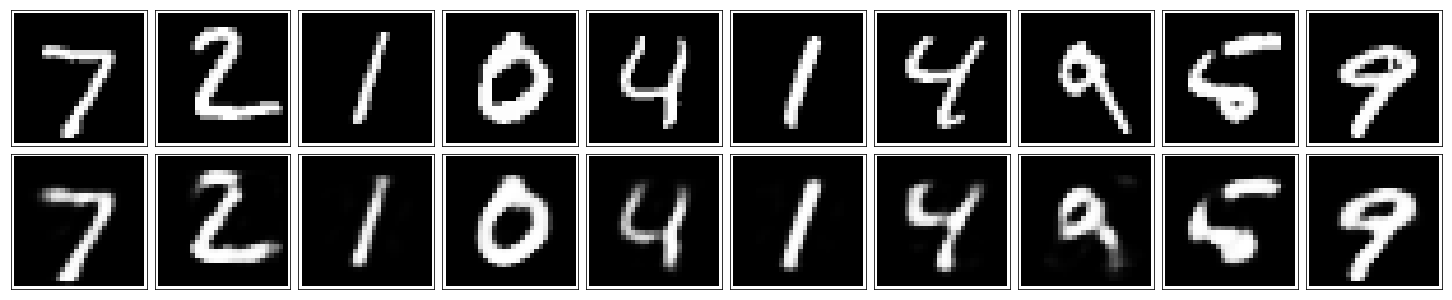

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [20]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.